In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df=pd.read_csv(path,header=None)
df.columns =  ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']
X=df.drop(['species'],axis=1).to_numpy()
y=df['species'].to_numpy()
y=np.where(y=='Iris-setosa',0,np.where(y=='Iris-versicolor',1,2)) #if-else와 비슷한 문법
X=X[:,[2,3]]

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=1,stratify=y)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 의사결정트리 

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
tree=DecisionTreeClassifier(random_state=1); #default 인수

In [25]:
tree.fit(X_train,y_train) #std가 없는게 더 좋다

DecisionTreeClassifier(random_state=1)

In [26]:
tree.score(X_train,y_train) #혹시 과대적합?? 의심이 됨

0.9904761904761905

In [27]:
tree.score(X_test,y_test) #test도 97% => 과대 적합 문제 아닌것 처럼 느껴짐 -> but, 과대적합 옵션이 없으면 full tree

0.9777777777777777

In [28]:
tree.get_depth() #트리 깊이

6

In [35]:
tree.get_n_leaves() #잎 개수

8

### 최대 깊이 설정

In [30]:
tree4=DecisionTreeClassifier(max_depth=4,random_state=1)

In [31]:
tree4.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [32]:
tree4.score(X_train,y_train)

0.9714285714285714

In [36]:
tree4.score(X_test,y_test) #최대 길이 설정 이후에 별 차이가 없다면 심플이 좋음

0.9777777777777777

In [37]:
tree2=DecisionTreeClassifier(max_depth=2,random_state=1)

In [38]:
tree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [39]:
tree2.score(X_train,y_train)

0.9523809523809523

In [40]:
tree2.score(X_test,y_test)

0.9555555555555556

In [41]:
from sklearn.tree import plot_tree

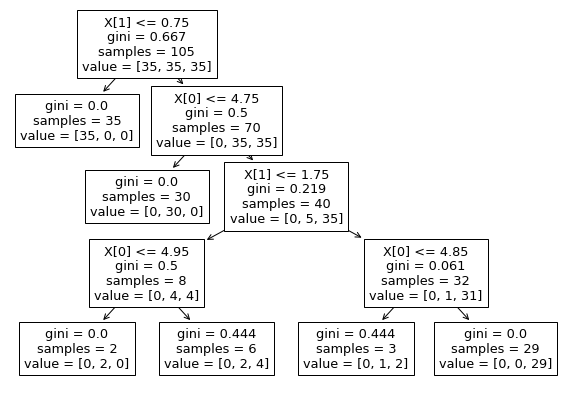

In [47]:
plt.figure(figsize=(10,7))
plot_tree(tree4);

In [50]:
tree4.predict([[6.0,2.5]]) 

array([2])

In [51]:
tree4.feature_importances_ #X1이 더 큼, 꽃잎의 너비가 더 중요한 변수임

array([0.42708333, 0.57291667])